In [1]:
import numpy as np
import matplotlib.pyplot
import json
import progressbar
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

c:\users\fanhangming\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
text2code = {}
text = ['orange hair', 'white hair', 'aqua hair', 'gray hair',
 'green hair', 'red hair', 'purple hair', 'pink hair',
  'blue hair', 'black hair', 'brown hair', 'blonde hair',  'black eyes', 'orange eyes',
 'pink eyes', 'yellow eyes', 'aqua eyes', 'purple eyes',
 'green eyes', 'brown eyes', 'red eyes', 'blue eyes']
for i in range(len(text)):
    text2code[text[i]] = i

In [2]:
len(text)

22

In [3]:
labels = []
with open('./dataset/extra_data/tags.csv', 'r') as f:
    for line in f.readlines():
        label = np.zeros(22, dtype=np.float32)
        line = line.split(',')[1].split(' ')
        hair = line[0] + ' ' + line[1]
        eyes = line[2] + ' ' + line[3]
        label[text2code[hair]] += 1
        label[text2code[eyes[:-1]]] += 1
        labels.append(label)

In [4]:
progress = progressbar.ProgressBar()

In [5]:
img_num = 36740
images = []
progress.start(img_num)
for i in range(img_num):
    img = plt.imread('./dataset/extra_data/images/' + str(i) + '.jpg')
    cv2.resize(img, (64, 64), interpolation = cv2.INTER_CUBIC)
    img = img / 127.5 - 1
    images.append(img.astype(np.float32))
    progress.update(i)
progress.finish()

100% (36740 of 36740) |##################| Elapsed Time: 0:02:09 Time:  0:02:09


In [7]:
writer = tf.python_io.TFRecordWriter('./dataset/tfrecords/anime_label.tfrecords')
progress = progressbar.ProgressBar()
progress.start(len(labels))
for i in range(img_num):
    label = labels[i].reshape(-1).tobytes()
    image = images[i].reshape(-1).tobytes()
    example = tf.train.Example(
        features = tf.train.Features(feature={
            'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label])),
            'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image]))
        }))
    writer.write(example.SerializeToString())
    progress.update(i)
writer.close()
progress.finish()

100% (36740 of 36740) |##################| Elapsed Time: 0:06:57 Time:  0:06:57


In [2]:
def read_and_decode(file_name):
    filename_queue = tf.train.string_input_producer([file_name])
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)

    features = tf.parse_single_example(serialized_example, features={
        'label': tf.FixedLenFeature([], tf.string),
        'image': tf.FixedLenFeature([], tf.string)
    })
    
    label = tf.decode_raw(features['label'], tf.float32)
    image = tf.decode_raw(features['image'], tf.float32)
    
    image.set_shape([64*64*3])
    image = tf.reshape(image, [64, 64, 3])
    label.set_shape([22])
    label = tf.reshape(label, [22])
    return image, label

Test

here
here here
here here here


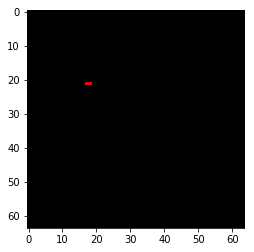

In [3]:
# mmp...........
#feature, label = read_and_decode("./dataset/anime_label.tfrecords")
#feature, label = read_and_decode("./dataset/tfrecords/anime_label.tfrecords")
feature, label = read_and_decode('train.tfrecords')
feature, label = read_and_decode('./dataset/tfrecords/anime_label.tfrecords')

feature_batch, label_batch = tf.train.shuffle_batch([feature, label],
                                                   batch_size=32,
                                                   capacity=100, min_after_dequeue=80)

with tf.Session() as sess:
    print('here')
    sess.run(tf.global_variables_initializer())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    print('here here')
    f__, l__ = sess.run([feature_batch, label_batch])
    print('here here here')
    plt.imshow(np.uint8(f__[0]))
    coord.request_stop()
    coord.join(threads)